# **Perceptrón**

## 1.1 Fundamentos de la técnica
El perceptrón es un modelo de neurona artificial que recibe un conjunto de entradas (características o variables del dato), cada una con un peso que indica su importancia. Estos pesos determinan la influencia de cada entrada en la decisión final. El modelo calcula una combinación lineal de las entradas y los pesos, agrega un término de sesgo (bias) que permite ajustar la posición del umbral de decisión y aplica una función de activación.

El proceso de decisión del perceptrón es binario, lo que le permite clasificar los datos en dos categorías distintas. Su capacidad de aprendizaje proviene del ajuste de los pesos y el sesgo cada vez que comete un error, en un proceso conocido como corrección de errores. Este mecanismo constituye la base del aprendizaje automático moderno.

Sin embargo, el perceptrón tiene una limitación importante: solo puede resolver problemas linealmente separables, es decir, aquellos en los que una línea o un plano puede dividir claramente las clases. Si los datos no cumplen esta condición, el modelo no logra clasificarlos correctamente.

A pesar de ello, el perceptrón fue un avance fundamental, ya que demostró que las máquinas podían aprender y sentó las bases para las redes neuronales modernas, con múltiples capas y arquitecturas más complejas.


## 1.2 Modelo Matemático del Perceptrón
La ecuación básica que describe el funcionamiento del perceptrón es la siguiente:

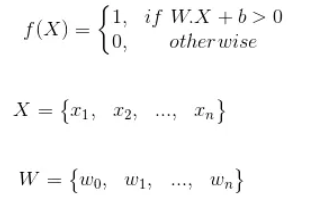

Donde f(x) es la función de salida que depende de las entradas W, X y b.

X son las características de entrada (features).

W son los pesos asignados a cada característica.

b es el sesgo (bias) añadido. Se utiliza en los casos donde la entrada y/o el peso son 0, pero se requiere que la salida sea mayor que 0.

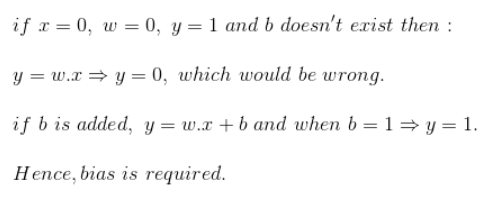

Nota: Un perceptrón es muy similar a la ecuación de regresión o clasificación lineal


## 1.3 Descripción de la librería, clases, funciones (python) empleadas en programar el Perceptrón
En este proyecto se emplean diversas librerías del ecosistema científico de Python, enfocadas en el manejo de datos, la normalización, el modelado y la evaluación de algoritmos de aprendizaje automático supervisado.

* NumPy (numpy): utilizada para realizar operaciones numéricas y manejar los arreglos multidimensionales que representan las muestras y características del conjunto de datos.

* Pandas (pandas): permite estructurar los datos en un DataFrame, lo que facilita su exploración, análisis y transformación antes del modelado.

* Scikit-learn (sklearn): es la librería central en la implementación del modelo de Perceptrón y en la preparación de los datos. De ella se emplean los siguientes módulos:

* datasets.load_iris: carga el conjunto de datos Iris, un clásico en la clasificación supervisada.

* model_selection.train_test_split: divide el conjunto de datos en subconjuntos de entrenamiento (75%) y prueba (25%), asegurando que las clases estén equilibradas mediante el parámetro stratify.

* preprocessing.StandardScaler: normaliza las características numéricas, de modo que todas tengan media 0 y desviación estándar 1, lo que mejora la estabilidad del modelo durante el aprendizaje.

* linear_model.Perceptron: implementa el algoritmo de Perceptrón, un modelo lineal de clasificación binaria que aprende un hiperplano de decisión separando las clases mediante actualizaciones iterativas de pesos.

* metrics.accuracy_score: calcula la exactitud (accuracy), es decir, el porcentaje de aciertos en las predicciones del modelo.

* metrics.confusion_matrix: genera la matriz de confusión, que permite visualizar los aciertos y errores en la clasificación de cada clase.

* metrics.classification_report: produce un informe detallado con las métricas de precisión (precision), recuperación (recall) y puntaje F1, que evalúan el rendimiento del modelo en mayor profundidad.

* Función personalizada predict_example(): permite evaluar el modelo con una sola muestra de entrada. Esta función escala el ejemplo con el mismo estándar aplicado a los datos de entrenamiento y devuelve tanto el número de clase predicho como su etiqueta textual (por ejemplo, setosa o versicolor).

En conjunto, estas librerías y funciones conforman un flujo completo de trabajo que incluye la carga, normalización, entrenamiento, predicción y evaluación del modelo de Perceptrón, permitiendo analizar su capacidad de separación lineal entre las especies del conjunto Iris.

## 1.4 Pipeline


#### Feature Engineering

**Descripción de variables/señales:**

En el ejemplo usaremos el dataset Iris convertido a problema binario (dos clases) para que el perceptrón pueda aprender un separador lineal. Las variables son medidas de flores: sepal length, sepal width, petal length, petal width.

**Preprocesamiento aplicado:**

load_iris() carga el dataset Iris, que contiene 150 flores de tres especies: setosa, versicolor y virginica.

X contiene las características numéricas (longitud y ancho de sépalos y pétalos).

y contiene las etiquetas de clase (0, 1, 2).

Luego se filtra el dataset para usar solo dos clases (setosa y versicolor),  esto lo convierte en un problema binario, ideal para mostrar cómo funciona un perceptrón (que es un clasificador lineal binario).

El perceptrón no funciona bien si las variables tienen diferentes escalas (por ejemplo, cm vs mm). Por eso se usa StandardScaler() para centrar los datos en media 0 y desviación estándar 1.
Esto mejora la convergencia del modelo durante el entrenamiento.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RANDOM_STATE = 42

iris = load_iris()
X = iris.data
y = iris.target

mask = y != 2
X = X[mask]
y = y[mask]


df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


#### Model Selection

Razones formales para elegir un clasificador lineal (Perceptrón):

Si los datos son (o se aproximan a ser) linealmente separables, un clasificador lineal es suficiente y demuestra buena capacidad de generalización.

El perceptrón es computacionalmente ligero y fácil de interpretar (los pesos indican importancia direccional de cada feature).

En tareas donde se requiere explicabilidad, un modelo lineal es preferible.

Citar: la teoría de perceptrones y la condición de separabilidad lineal (ver referencias abajo).

#### Model Training

Se divide el dataset en:

* 75% para entrenamiento

* 25% para prueba

stratify=y asegura que ambas divisiones mantengan la misma proporción de clases.
Esto es importante para que el modelo no quede sesgado hacia una clase.

Se crea una instancia del modelo Perceptron con los siguientes parámetros:

* max_iter=1000: número máximo de iteraciones.

* tol=1e-3: tolerancia mínima al cambio del error (criterio de parada).

* random_state: para reproducibilidad.

Luego, clf.fit() entrena el modelo aprendiendo los pesos (coef_) y el sesgo (intercept_) que mejor separan las dos clases.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)


clf = Perceptron(max_iter=1000, tol=1e-3, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)


print("Pesos aprendidos:", clf.coef_)
print("Bias (intercept):", clf.intercept_)

Pesos aprendidos: [[ 1.45501408 -0.41776955  0.99772405  0.91406997]]
Bias (intercept): [1.]


#### Prediction

Esta sección define y utiliza una función llamada predict_example, la cual permite realizar predicciones individuales con el modelo entrenado.
La función recibe un ejemplo de entrada (x_raw), lo transforma con el mismo escalador usado en el entrenamiento y obtiene la clase predicha por el perceptrón.
Posteriormente, se prueba con un ejemplo real del conjunto de datos (X[51]), mostrando tanto el vector de características como la clase estimada (por ejemplo, setosa o versicolor).

In [3]:

def predict_example(model, scaler, x_raw, feature_names=None, target_names=None):
    x_arr = np.array(x_raw).reshape(1, -1)
    x_scaled = scaler.transform(x_arr)
    y_hat = int(model.predict(x_scaled)[0])
    label = target_names[y_hat] if target_names is not None else str(y_hat)
    return y_hat, label

feature_names = iris.feature_names
target_names = iris.target_names[:2]

example = X[51]
print("Ejemplo de entrada:", example)

y_hat, label = predict_example(clf, scaler, example, feature_names, target_names)
print(f"Predicción para el ejemplo = Clase {y_hat} ({label})")


Ejemplo de entrada: [6.4 3.2 4.5 1.5]
Predicción para el ejemplo = Clase 1 (versicolor)


#### Model Evaluation

Esta sección evalúa el rendimiento del modelo entrenado utilizando el conjunto de prueba (X_test).
Primero, se generan las predicciones (y_pred) y luego se calculan tres métricas clave:

* Accuracy: indica el porcentaje total de aciertos del modelo.
* Matriz de confusión: muestra cuántos ejemplos de cada clase fueron clasificados correctamente o incorrectamente.
* Reporte de clasificación: resume el desempeño por clase mediante métricas como precision, recall y f1-score.

In [4]:

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=target_names)

print(f"\nAccuracy del modelo: {acc:.4f}")
print("Matriz de confusión:\n", cm)
print("Reporte de clasificación:\n", cr)


Accuracy del modelo: 1.0000
Matriz de confusión:
 [[13  0]
 [ 0 12]]
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



# Referencias

* DeepAI. (2020, 25 junio). Perceptron. DeepAI. https://deepai.org/machine-learning-glossary-and-terms/perceptron Kashyap, A. (2019, 15 noviembre).
* Math behind Perceptrons. Medium. https://medium.com/@iamask09/math-behind-perceptrons-7241d5dadbfc

* Tahir. (2025, 21 marzo). 🧠What is The Perceptron:A Foundational Neural Network Model. Medium. https://medium.com/%40tahirbalarabe2/what-is-the-perceptron-a-foundational-neural-network-model-c722687dc51a

